In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn. linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import r_regression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [65]:
# Не нашёл функции для генерации синтетического временного ряда, сгенерировал вручную
X = {'sin':[np.sin(i/16)*i/2 for i in range(1000)],'trend':[i*2+7 for i in range(1000)], 'noise':[20 * np.random.normal() for i in range(1000)], 'time':[i for i in range(1000)]}
X = pd.DataFrame(X)
X

,sin,trend,noise,time
0,0.000000,7,5.911902,0
1,0.031230,9,9.318047,1
2,0.124675,11,27.380278,2
3,0.279605,13,25.951987,3
4,0.494808,15,-13.439550,4
...,...,...,...,...
995,-298.838973,1997,29.554333,995
996,-273.687364,1999,-7.064123,996
997,-247.414831,2001,9.736195,997
998,-220.121924,2003,-1.989539,998


In [67]:
t_series_y = X.sin + X.trend + X.noise
t_series_y
t_series_x = [i for i in range(1000)]

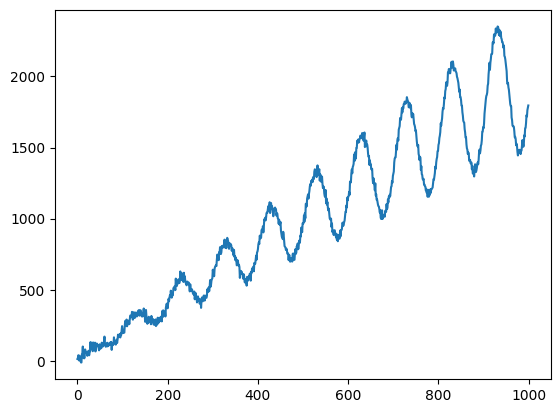

In [92]:
# Строим график сгенерированного ряда
plt.plot(t_series_x, t_series_y)

In [94]:
# Для деления временного ряда есть ф-я, но делаем вручную то же самое
X_train,X_test,y_train,y_test = X[:800], X[800:], t_series_y[:800], t_series_y[800:]

In [110]:
# Строим модель с помощью Автокорреляционной модели
lin_m = linear_model.ARDRegression()
lin_m.fit(X_train, y_train)
y_pred_lin_m = lin_m.predict(X_test)

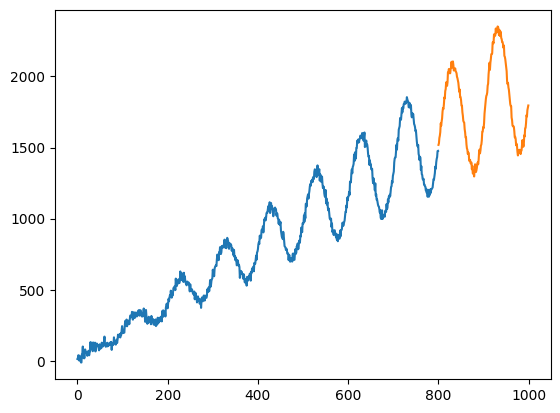

In [112]:
# Строим график тестовой + прогноз AR
plt.plot(X_train['time'], y_train)
plt.plot(X_test['time'], y_pred_lin_m)

In [174]:
# Вручную строим модель экспоненциального сглаживания (от одного признака)
alpha = 0.2
y_train = np.array(y_train) 
# первое значение совпадает со значением временного ряда
exp_smoothing = [y_train[0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(y_train)):
  exp_smoothing.append(alpha * y_train[i] + (1 - alpha) * exp_smoothing[i - 1])
    
for i in range(len(y_train),len(y_train) + len(y_test)):
    exp_smoothing.append(alpha * y_test[i] + (1 - alpha) * exp_smoothing[i - 1])

y_pred_exp = exp_smoothing[len(X_train):]

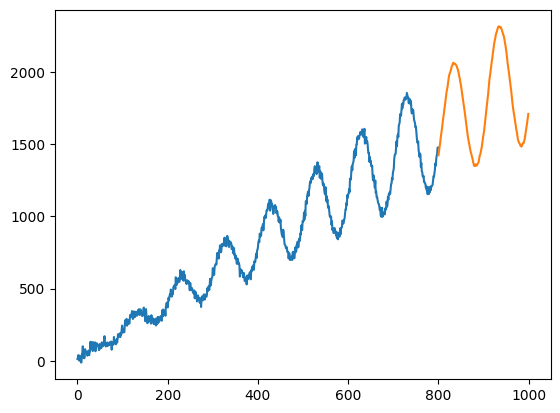

In [176]:
# Строим график тестовой + прогноз ETS
plt.plot(X_train['time'], y_train)
plt.plot(X_test['time'], y_pred_exp)

In [178]:
print('Автокорреляционная модель MAE = ', mean_absolute_error(y_test, y_pred_lin_m))
print('Модель экспоненциального сглаживания MAE = ',mean_absolute_error(y_test, y_pred_exp))

Автокорреляционная модель MAE =  0.0008584978195187887
Модель экспоненциального сглаживания MAE =  68.66776374350006


In [180]:
print('Автокорреляционная модель RSME = ', root_mean_squared_error(y_test, y_pred_lin_m))
print('Модель экспоненциального сглаживания RSME = ', root_mean_squared_error(y_test, y_pred_exp))

Автокорреляционная модель RSME =  0.000864196067186059
Модель экспоненциального сглаживания RSME =  76.84246198594829


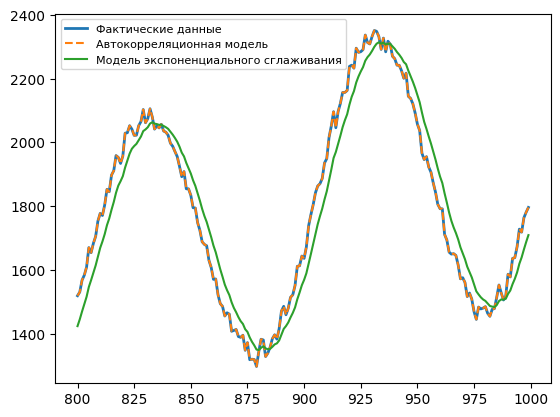

In [182]:
# Строим графики с фактическими значениями и прогнозами моделей
plt.plot(X_test['time'], y_test, linewidth=2)
plt.plot(X_test['time'], y_pred_lin_m, '--', linewidth=1.5)
plt.plot(X_test['time'], y_pred_exp, linewidth=1.5)
plt.legend (('Фактические данные', 'Автокорреляционная модель', 'Модель экспоненциального сглаживания'), fontsize="8",  loc='upper left' )